# Première analyse Antoine : Sans contact

## Librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

## Data

In [2]:
df_contactless = pd.read_pickle(f"/home/cash/output/cleaned_queries/with_geoloc/query_fr_contactless_cleaned_geoloc.pickle")
print(df_contactless.shape)
df_contactless.dtypes

(23336, 49)


id                            int64
conversation_id               int64
created_at                   object
date                         object
time                         object
timezone                      int64
user_id                       int64
username                     object
name                         object
place                        object
tweet                        object
language                     object
mentions                     object
urls                         object
photos                       object
replies_count                 int64
retweets_count                int64
likes_count                   int64
hashtags                     object
cashtags                     object
link                         object
retweet                        bool
quote_url                    object
video                         int64
thumbnail                    object
near                        float64
geo                         float64
source                      

## Préparation

In [3]:
# pris sur script Chloé
# enlever les colonnes qui n'ont qu'une seule valeur

columns_to_remove = df_contactless.columns[df_contactless.nunique() <= 1]
print(columns_to_remove)
print(len(columns_to_remove))
df_contactless = df_contactless.drop(columns=columns_to_remove)
print(df_contactless.shape)

Index(['timezone', 'retweet', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'retweet_date', 'translate', 'trans_src', 'trans_dest',
       'english_score', 'country_profile'],
      dtype='object')
14
(23336, 35)


In [4]:
# enlever colonnes avec trop de NaNs

np.round((len(df_contactless) - df_contactless.count()) / len(df_contactless) * 100, 
                       decimals = 2) 

treshold_nan = 0.95
columns_to_remove = df_contactless.columns[df_contactless.isna().sum() > df_contactless.shape[0]*treshold_nan ]
print(columns_to_remove)
df_contactless = df_contactless.drop(columns=columns_to_remove)
print(df_contactless.shape)
df_contactless.head(2)

Index(['place', 'quote_url'], dtype='object')
(23336, 33)


,id,conversation_id,created_at,date,time,user_id,username,name,tweet,language,...,clean_tweet,pertinence_score,french_score,datetime,location_profile,osm_value_profile,name_profile,county_profile,state_profile,type_profile
0,1159483826411835392,1159345639110643712,2019-08-08 15:17:41 UTC,2019-08-08,15:17:41,389662765,applydia,Lydia,"@megaviria Bonjour, La carte Lydia est une car...",fr,...,@megaviria bonjour la carte lydia est une car...,13,17,2019-08-08 15:17:41,france,country,France,NaN,NaN,country
1,1251045979568078848,1251045979568078848,2020-04-17 07:12:59 UTC,2020-04-17,07:12:59,2301655346,galitt_officiel,galitt,Coronavirus : le plafond du paiement sans cont...,fr,...,coronavirus le plafond du paiement sans cont...,12,6,2020-04-17 07:12:59,paris - france,administrative,Paris,NaN,Île-de-France,county


In [5]:
# conversion de certaines colonnes vers le bon type

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df_contactless.select_dtypes(include=numerics)
print("##### NUMERICAL #####",df_numeric.dtypes)

df_categorical = df_contactless.select_dtypes(exclude=numerics)
print("##### CATEGORICAL #####", df_categorical.columns)


# date time
columns_date = ['created_at', 'date', 'time']

for col in columns_date :
    t1 = time.time()
    df_categorical[col] = pd.to_datetime(df_categorical[col], infer_datetime_format=False)
    print("duree pour la colonne ", col, " : ", time.time() - t1)
    
dates = ['datetime64[ns]', 'datetime64[ns, UTC]']
df_date = df_categorical.select_dtypes(include=dates)
print("##### DATES #####", df_date.dtypes)

df_categorical = df_categorical.select_dtypes(exclude=dates)
print("##### CATEGORICAL #####", df_categorical.columns)

##### NUMERICAL ##### id                  int64
conversation_id     int64
user_id             int64
replies_count       int64
retweets_count      int64
likes_count         int64
video               int64
pertinence_score    int64
french_score        int64
dtype: object
##### CATEGORICAL ##### Index(['created_at', 'date', 'time', 'username', 'name', 'tweet', 'language',
       'mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'link',
       'thumbnail', 'reply_to', 'type_contactless', 'clean_tweet', 'datetime',
       'location_profile', 'osm_value_profile', 'name_profile',
       'county_profile', 'state_profile', 'type_profile'],
      dtype='object')


<ipython-input-5-dc9bf8310a09>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[col] = pd.to_datetime(df_categorical[col], infer_datetime_format=False)


duree pour la colonne  created_at  :  3.9013500213623047
duree pour la colonne  date  :  0.010989904403686523
duree pour la colonne  time  :  1.0398287773132324
##### DATES ##### created_at    datetime64[ns, UTC]
date               datetime64[ns]
time               datetime64[ns]
datetime           datetime64[ns]
dtype: object
##### CATEGORICAL ##### Index(['username', 'name', 'tweet', 'language', 'mentions', 'urls', 'photos',
       'hashtags', 'cashtags', 'link', 'thumbnail', 'reply_to',
       'type_contactless', 'clean_tweet', 'location_profile',
       'osm_value_profile', 'name_profile', 'county_profile', 'state_profile',
       'type_profile'],
      dtype='object')


In [17]:
# dataframe final

df_contactless = pd.concat([df_numeric, df_date, df_categorical], axis=1)
df_contactless.set_index("datetime", inplace=True)
print(df_contactless.shape)
df_contactless.head(2)

(23336, 32)


,id,conversation_id,user_id,replies_count,retweets_count,likes_count,video,pertinence_score,french_score,created_at,...,thumbnail,reply_to,type_contactless,clean_tweet,location_profile,osm_value_profile,name_profile,county_profile,state_profile,type_profile
datetime,,,,,,,,,,,,,,,,,,,,,
2019-08-08 15:17:41,1159483826411835392,1159345639110643712,389662765,1,0,0,0,13,17,2019-08-08 15:17:41+00:00,...,NaN,"[{'screen_name': 'megaviria', 'name': 'Maria E...",smartphone,@megaviria bonjour la carte lydia est une car...,france,country,France,NaN,NaN,country
2020-04-17 07:12:59,1251045979568078848,1251045979568078848,2301655346,0,2,2,1,12,6,2020-04-17 07:12:59+00:00,...,https://pbs.twimg.com/media/EVybGQCXkAAjPlR.jpg,[],cb,coronavirus le plafond du paiement sans cont...,paris - france,administrative,Paris,NaN,Île-de-France,county


## Première analyse

In [7]:
df_contactless.describe()

,id,conversation_id,user_id,replies_count,retweets_count,likes_count,video,pertinence_score,french_score
count,2.333600e+04,2.333600e+04,2.333600e+04,23336.000000,23336.000000,23336.000000,23336.000000,23336.000000,23336.000000
mean,1.161903e+18,1.161583e+18,2.397394e+17,0.526397,1.174751,3.053051,0.297737,2.766755,6.555494
std,1.269227e+17,1.269969e+17,4.184079e+17,3.355066,15.401134,36.234048,0.457273,1.370469,4.359819
min,9.477734e+17,8.015348e+17,4.621130e+05,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.044690e+18,1.044233e+18,2.320871e+08,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
50%,1.175816e+18,1.174949e+18,1.338990e+09,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000
75%,1.261584e+18,1.261489e+18,7.081657e+17,1.000000,0.000000,1.000000,1.000000,3.000000,9.000000
max,1.388264e+18,1.388208e+18,1.380451e+18,231.000000,1864.000000,2544.000000,1.000000,13.000000,27.000000


### CB vs Smartphone

In [18]:
# comparer cb et smartphone dans un premier temps et pour prendre en main les fonctions
df_cb = df_contactless[df_contactless['type_contactless'] == 'cb']
df_smartphone = df_contactless[df_contactless['type_contactless'] == 'smartphone']

print('shape df cb :', df_cb.shape)
print('shape df smartphone :', df_smartphone.shape)

shape df cb : (15330, 32)
shape df smartphone : (8006, 32)


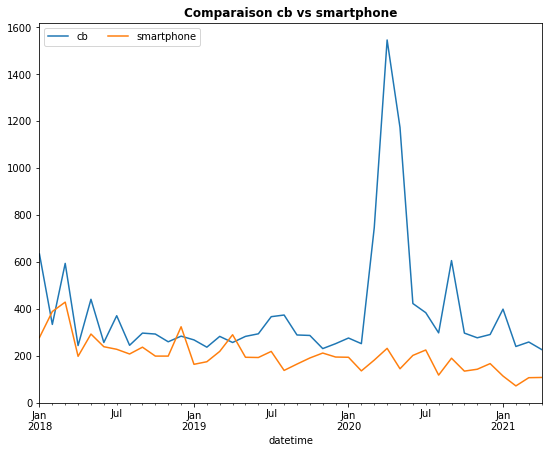

In [33]:
cb = df_cb['id'].resample("M").count()
smartphone = df_smartphone['id'].resample("M").count()

ax = cb.plot(figsize=(9, 7), label = "cb")
ax = smartphone.plot(figsize=(9, 7),  label = "smartphone")

ax.set_title("Comparaison cb vs smartphone", fontweight="bold")
ax.legend(ncol=2, loc="upper left")

### Points d'attention (plafond, peur fraude, frais, protection contamination)

Points d'attention à étudier : le plafond de paiement, la peur de la fraude via le sans contact, les frais bancaires, la protection contre la contamination offerte par le sans contact

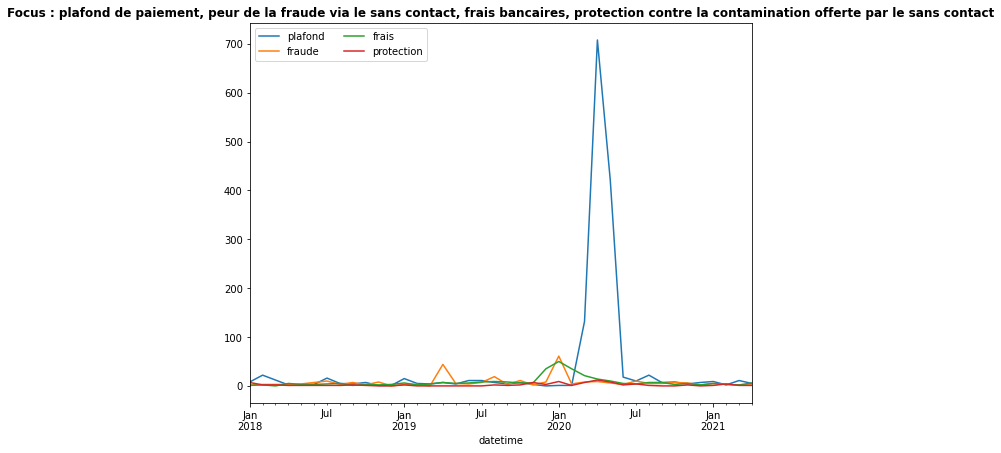

In [37]:
# points d'attention

plafond = df_contactless.tweet.str.count("plafond").resample("M").sum()
fraude = df_contactless.tweet.str.count("peur | fraude").resample("M").sum()
frais = df_contactless.tweet.str.count("frais").resample("M").sum()
protection = df_contactless.tweet.str.count("protection | contamination").resample("M").sum()

ax = plafond.plot(figsize=(9, 7),  label = "plafond")
ax = fraude.plot(figsize=(9, 7),  label = "fraude")
ax = frais.plot(figsize=(9, 7),  label = "frais")
ax = protection.plot(figsize=(9, 7),  label = "protection")

ax.set_title("Focus : plafond de paiement, peur de la fraude via le sans contact, frais bancaires, protection contre la contamination offerte par le sans contact", fontweight="bold")
ax.legend(ncol=2, loc="upper left")

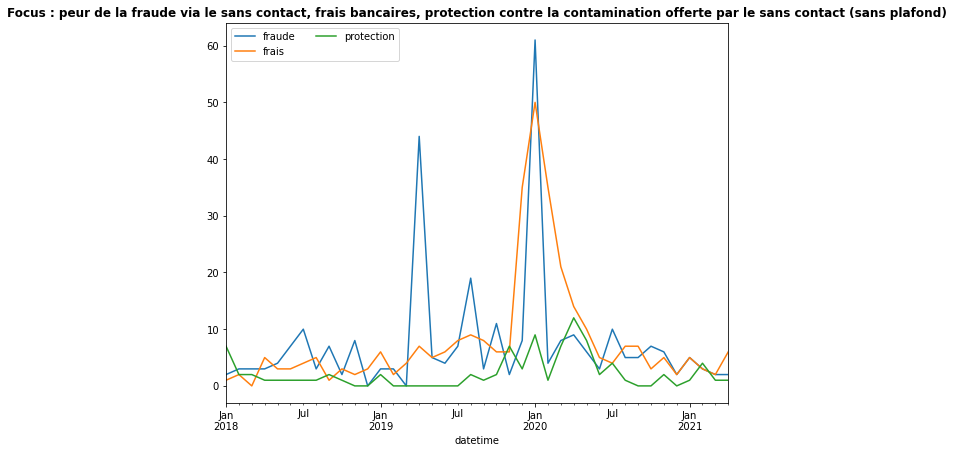

In [38]:
# séparer plafond du reste car forte différence de valeur qui rend le plot moins lisible

ax = fraude.plot(figsize=(9, 7),  label = "fraude")
ax = frais.plot(figsize=(9, 7),  label = "frais")
ax = protection.plot(figsize=(9, 7),  label = "protection")

ax.set_title("Focus : peur de la fraude via le sans contact, frais bancaires, protection contre la contamination offerte par le sans contact (sans plafond)", fontweight="bold")
ax.legend(ncol=2, loc="upper left")

### A quoi correspondent les pics ?

In [43]:
# plafond

df_contactless[df_contactless.tweet.str.contains("plafond")].loc["2020-04"].clean_tweet.sample(20).tolist()

['paiement sans contact\xa0  le plafond de paiement déconfiné le 11\xa0mai  rien n est moins sûr   ///mnmh8g2pho via @zdnetfr',
 'paiement sans contact\xa0  bientôt un plafond à 50\xa0euros   ///bojxj0orny',
 'question  le plafond de paiement sans contact a-t-il été augmenté (30€ max de base) ?',
 '🇫🇷 pandémie de #coronavirus   les banques envisagent de passer le plafond du paiement sans contact de 30 à 50 euros pour limiter l utilisation de la «\xa0monnaie liquide\xa0» et ainsi lutter contre la transmission du #covid_19  (bfmtv) #confinementjour25',
 'le plafond du paiement sans contact passe à 50 €   ///pcimmyipfx   ///fwif1ddrvg',
 '[information #utile] 📢 les banques françaises relèvent de 30 € à 50 € le plafond de paiement sans contact par carte bancaire à partir du 11 mai 2020  @economie_gouv   ///z3o3wxil8x',
 'la plafond des titres restaurant lui aussi impacté par la crise covid-19 et réhaussé toumme le plafond des cartes sans contact ',
 'a partir du 11 mai  le plafond des paie

Pour le plafond, le pic en avril 2020 correspond à la news du passage du plafond à 50€ au début de la crise sanitaire

In [48]:
# fraude

print(df_contactless[df_contactless.tweet.str.contains("peur | fraude")].loc["2019-04"].clean_tweet.sample(10).tolist())

print(df_contactless[df_contactless.tweet.str.contains("peur | fraude")].loc["2019-08"].clean_tweet.sample(10).tolist())

print(df_contactless[df_contactless.tweet.str.contains("peur | fraude")].loc["2020-01"].clean_tweet.sample(10).tolist())


['faut-il avoir peur du paiement sans contact emment limiter les risques de piratage   ///fllcrexkhu…   ///xknna1jxkc', 'paiement sans contact\xa0  le gouvernement alerté sur le risque de fraude   ///jhe1c3fl4y #banque #cartebancaire   ///ldijqwjm9t', '«\xa0alerte sur le risque de fraude pour le paiement sans contact\xa0» — peuples observateurs avant garde togolaise et africaine   ///h7mghblcay via @carolionne89', '#numérique   paiement sans contact\xa0  le gouvernement alerté sur le risque de fraude   ///rgk3c1oqva', 'paiement sans contact  le gouvernement alerté sur le risque de fraude yonnescaut   ///7lqlzga3sq #important', 'paiement sans contact   le gouvernement alerté sur le risque de fraude - politique - numerama   ///vueayysjx3', 'paiement sans contact   le gouvernement alerté sur le risque de fraude via @numerama   ///qbktioyqos', '#paiement sans contact   le gouvernement alerté sur le risque de fraude #nfc #mobile #sécurité    ///6fv71n1l6g', '@numerama le taux de fraude en 2

Pour la peur de la fraude, des séries d'articles sur les fraudes au sans contact en avril 2019 (prise de conscience de ce type de fraude), août 2019 (sur les plages, "l'arnaque de l'été") et janvier 2020

In [52]:
# frais

df_contactless[df_contactless.tweet.str.contains("frais")].loc["2020-01"].clean_tweet.sample(20).tolist()

['#bonplan    ///ugyy6xswyf  sumup air terminal de paiement  tpv  aucuns frais mensuels  bluetooth  acceptez toutes les cartes bancaires  nfc  apple pay  google pay   ///sakmmbejw0',
 '#bonplan    ///kndek3i7oj  sumup air terminal de paiement  tpv  aucuns frais mensuels  bluetooth  acceptez toutes les cartes bancaires  nfc  apple pay  google pay   ///riqugljyqa',
 '#bonplan    ///wthd2lgp2a  sumup air terminal de paiement  tpv  aucuns frais mensuels  bluetooth  acceptez toutes les cartes bancaires  nfc  apple pay  google pay   ///a0amue0hwn',
 'sumup air terminal de paiement  tpv  aucuns frais mensuels  bluetooth  acceptez toutes les cartes bancaires  nfc  apple pay  google pay   9 99€  #soldes ➡   ///bwtmg4kob7 ⬅   ///xflkmmswbt',
 '#bonplan    ///wghj5rakot  sumup air terminal de paiement  tpv  aucuns frais mensuels  bluetooth  acceptez toutes les cartes bancaires  nfc  apple pay  google pay   ///zbawjgez4b',
 '#bonplan    ///iw9f5mk2zo  sumup air terminal de paiement  tpv  aucuns fr

Pour les frais bancaires, un pic de tweets en janvier 2020 sur le terminal de paiement SumUp Air (une fintech). Soit il venait de sortir, soit ce sont des bots qui font de la pub